<a href="https://www.kaggle.com/code/mostafamamdouhhassan/yolov8-vs-yolov11-vehicle-detection?scriptVersionId=219336845" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install ultralytics

# Importing Needed Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

# Loading YOLO Models 


In [4]:
# YOLOV8
model_v8 = YOLO('yolov8n.pt')

In [5]:
# YOLOV11
model_v11 = YOLO("yolo11n.pt")  

# Testing Models Before Finetuning


image 1/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-10_jpg.rf.b87509668caff369c5501325477e6d9a.jpg: 640x640 12 cars, 2 buss, 1 truck, 171.1ms
image 2/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-10_jpg.rf.ba480b311472ef957256801c3766128a.jpg: 640x640 12 cars, 3 buss, 93.4ms
image 3/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-11_jpg.rf.eb1b06090bd1c1814b87c18a2661990a.jpg: 640x640 10 cars, 2 buss, 88.8ms
image 4/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-12_jpg.rf.daf65f51adfd1817d026f3d4c3cf3d4c.jpg: 640x640 9 cars, 3 buss, 79.2ms
image 5/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dat

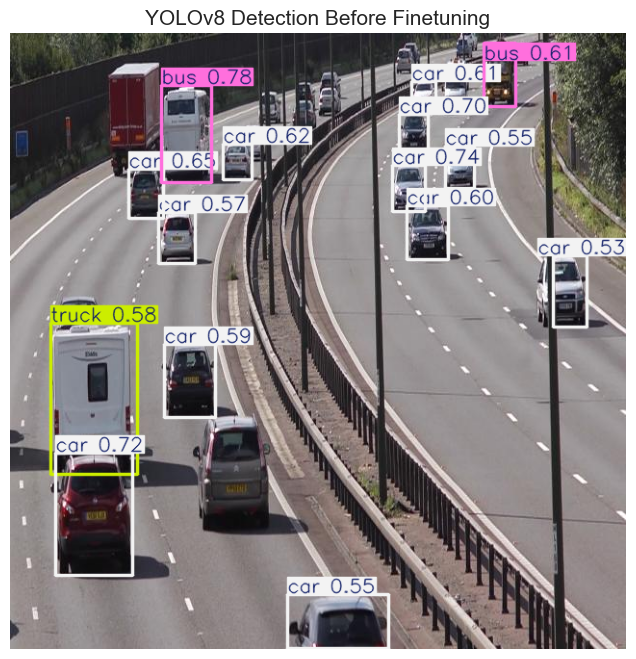

In [6]:
image_path = "./train/images"  # Update this path to the correct location of your image

# Predict using YOLOv8
result_v8 = model_v8.predict(
    source=image_path, 
    imgsz=640,  
    conf=0.5
)

# # Predict using YOLOv11
# result_v11 = model_v11.predict(
#     source=image_path, 
#     imgsz=640,  
#     conf=0.5
# )

# Plot results from YOLOv8
sample_image_v8 = result_v8[0].plot(line_width=2)
sample_image_v8 = cv2.cvtColor(sample_image_v8, cv2.COLOR_BGR2RGB)

# # Plot results from YOLOv11
# sample_image_v11 = result_v11[0].plot(line_width=2)
# sample_image_v11 = cv2.cvtColor(sample_image_v11, cv2.COLOR_BGR2RGB)

# Display the YOLOv8 result
plt.figure(figsize=(10, 8))
plt.imshow(sample_image_v8)
plt.title('YOLOv8 Detection Before Finetuning', fontsize=15)
plt.axis('off')
plt.show()

# # Display the YOLOv11 result
# plt.figure(figsize=(10, 8))
# plt.imshow(sample_image_v11)
# plt.title('YOLOv11 Detection Before Finetuning', fontsize=15)
# plt.axis('off')
# plt.show()


In [ ]:
# # Predict using YOLOv11
# result_v11 = model_v11.predict(
#     source=image_path, 
#     imgsz=640,  
#     conf=0.5
# )

# # Plot results from YOLOv11
# sample_image_v11 = result_v11[0].plot(line_width=2)
# sample_image_v11 = cv2.cvtColor(sample_image_v11, cv2.COLOR_BGR2RGB)

# # Display the YOLOv11 result
# plt.figure(figsize=(10, 8))
# plt.imshow(sample_image_v11)
# plt.title('YOLOv11 Detection Before Finetuning', fontsize=15)
# plt.axis('off')
# plt.show()


image 1/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-10_jpg.rf.b87509668caff369c5501325477e6d9a.jpg: 640x640 12 cars, 1 bus, 1 truck, 91.2ms
image 2/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-10_jpg.rf.ba480b311472ef957256801c3766128a.jpg: 640x640 11 cars, 1 bus, 2 trucks, 85.1ms
image 3/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-11_jpg.rf.eb1b06090bd1c1814b87c18a2661990a.jpg: 640x640 12 cars, 3 buss, 3 trucks, 95.3ms
image 4/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\images\10_mp4-12_jpg.rf.daf65f51adfd1817d026f3d4c3cf3d4c.jpg: 640x640 10 cars, 1 truck, 97.5ms
image 5/536 c:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_

: 

# Prepare Dataset

In [7]:
dataset_path = '.'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: ../train/images
val: ../valid/images



In [8]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 536
Number of validation images: 90
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


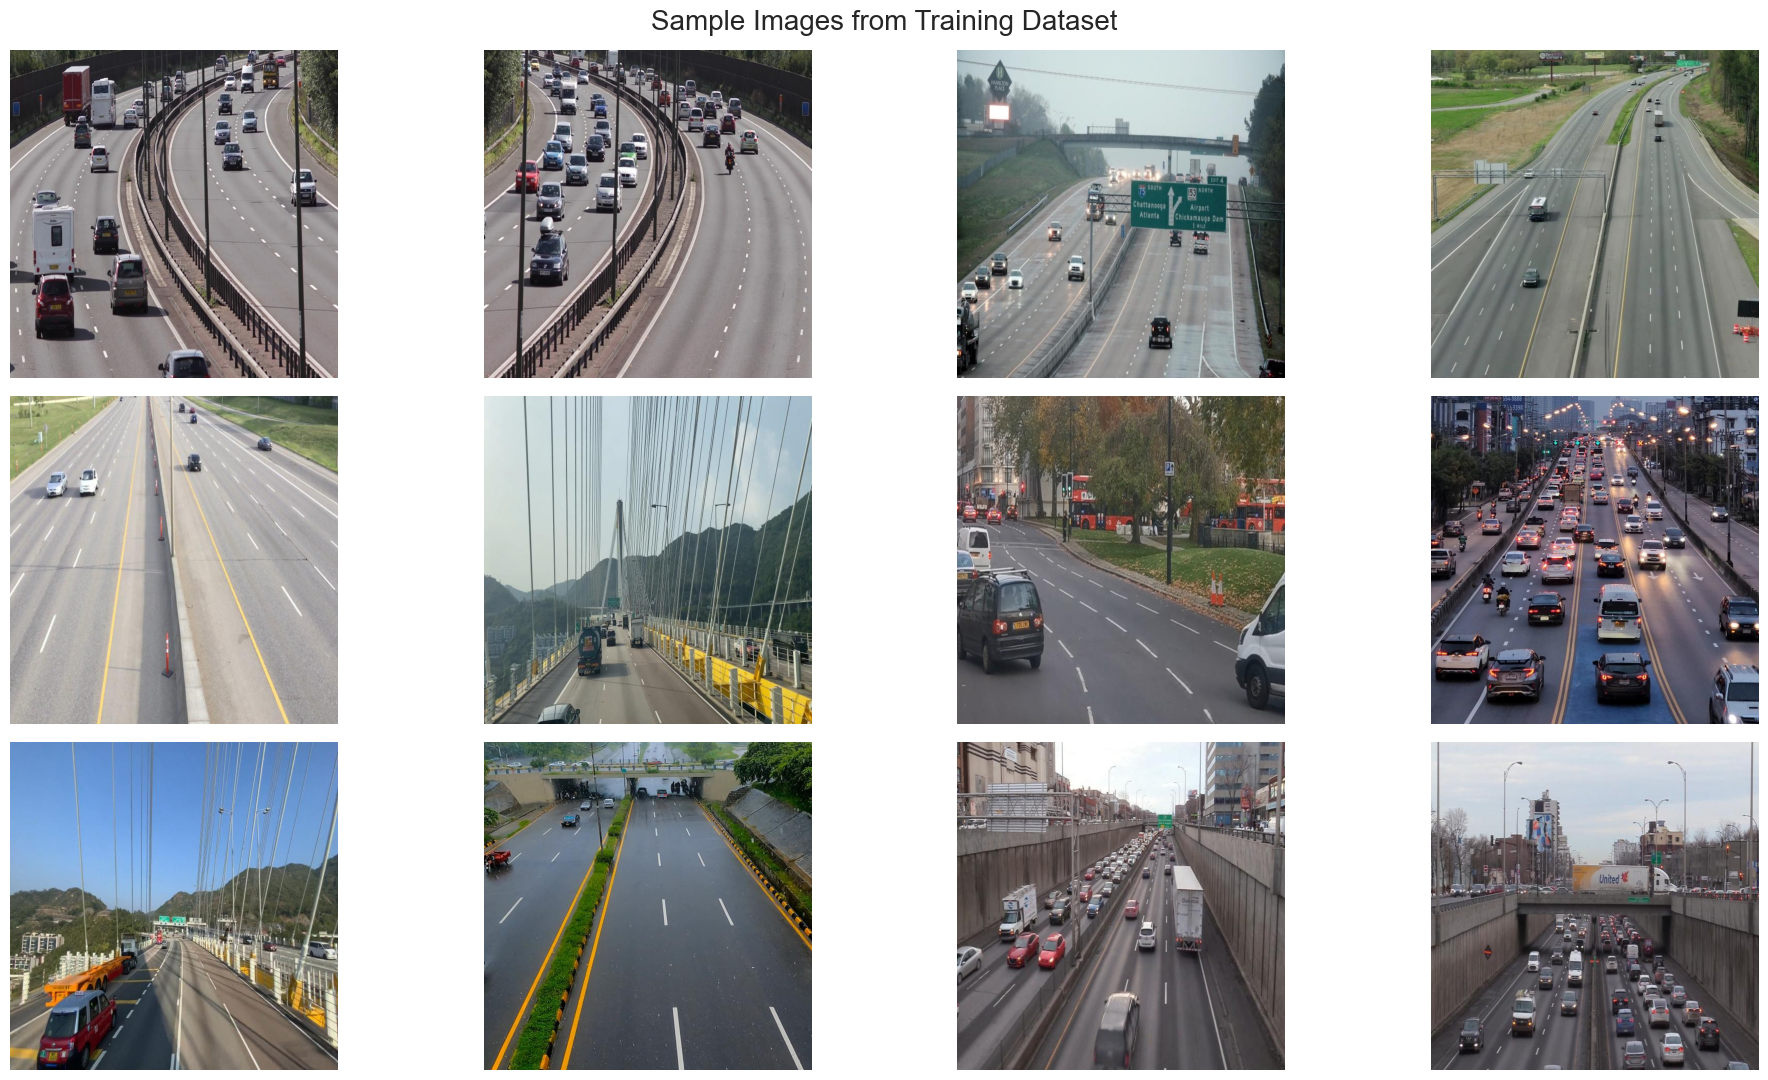

In [9]:
# List all jpg images in the directory
image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]

# Select 8 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 12)]

# Create a 2x4 subplot
fig, axes = plt.subplots(3, 4, figsize=(20, 11))

# Display each of the selected images
for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')  

plt.suptitle('Sample Images from Training Dataset', fontsize=20)
plt.tight_layout()
plt.show()

# Yolo Models Finetuning 

In [14]:
# Update the paths in the yaml_content dictionary
yaml_content['train'] = os.path.abspath(os.path.join(dataset_path, 'train', 'images'))
yaml_content['val'] = os.path.abspath(os.path.join(dataset_path, 'valid', 'images'))

# Write the updated yaml_content back to the data.yaml file
with open(yaml_file_path, 'w') as file:
    yaml.dump(yaml_content, file)

# Train the YOLOv8 model
results_v8 = model_v8.train(
    data=yaml_file_path,     
    epochs=100,              
    imgsz=640,               
    device='cpu',                 
    patience=5,             
    batch=32,                
    optimizer='Adam'                                       
)

Ultralytics 8.3.80  Python-3.12.7 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12450HX)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=.\data.yaml, epochs=100, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 2.69MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             


  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

train: Scanning C:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<00:00, 590.20it/s]

train: New cache created: C:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\train\labels.cache



val: Scanning C:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\valid\labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 610.08it/s]

val: New cache created: C:\Users\Abdallah\Desktop\YOLOv8-vs-YOLOv11-Vehicle-Detection-main\archive\Vehicle_Detection_Image_Dataset\valid\labels.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.763      1.941      1.331        363        640: 100%|██████████| 17/17 [02:11<00:00,  7.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]

                   all         90        937    0.00441      0.124    0.00746    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.355       1.05      1.085        409        640: 100%|██████████| 17/17 [02:11<00:00,  7.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.14s/it]

                   all         90        937      0.182      0.204      0.139     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G       1.28     0.9047      1.067        362        640: 100%|██████████| 17/17 [02:12<00:00,  7.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.91s/it]

                   all         90        937       0.25      0.517       0.21      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.217     0.8759      1.044        568        640:   6%|▌         | 1/17 [00:09<02:36,  9.79s/it]


KeyboardInterrupt: 

In [ ]:
# results_v11 = model_v11.train(
#     data=yaml_file_path,     
#     epochs=100,              
#     imgsz=640,               
#     device=0,                 
#     patience=5,             
#     batch=32,                
#     optimizer='Adam'                                       
# )

NameError: name 'model_v11' is not defined

# Comapring Performance 

In [ ]:
# Define the path to the directory
post_training_files_path_v8 = '/kaggle/working/runs/detect/train'
post_training_files_path_v11 = '/kaggle/working/runs/detect/train'

# List the files in the directory
!ls {post_training_files_path_v8}
!ls {post_training_files_path_v11}

'ls' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## **Learning Curves**

In [ ]:
#Create the full file path for 'results.csv' using the directory path and file name
results_csv_path_v8 = os.path.join(post_training_files_path_v8, '/kaggle/working/runs/detect/train/results.csv')
results_csv_path_v11 = os.path.join(post_training_files_path_v11, '/kaggle/working/runs/detect/train2/results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df_v8 = pd.read_csv(results_csv_path_v8)
df_v11 = pd.read_csv(results_csv_path_v11)

# Remove any leading whitespace from the column names
df_v8.columns = df_v8.columns.str.strip()
df_v11.columns = df_v11.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df_v8, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve For YOLO V8')
plot_learning_curve(df_v11, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve For YOLO V11')

NameError: name 'os' is not defined

## **Confusion Matrix**

In [ ]:
confusion_matrix_path_v8 = os.path.join(post_training_files_path_v8, '/kaggle/working/runs/detect/train/confusion_matrix.png')
confusion_matrix_path_v11 = os.path.join(post_training_files_path_v11, '/kaggle/working/runs/detect/train2/confusion_matrix.png')

cm_img_v8 = cv2.imread(confusion_matrix_path_v8)
cm_img_v8 = cv2.cvtColor(cm_img_v8, cv2.COLOR_BGR2RGB)

cm_img_v11 = cv2.imread(confusion_matrix_path_v11)
cm_img_11 = cv2.cvtColor(cm_img_v11, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img_v8)
plt.axis('off') 
plt.show()

plt.figure(figsize=(10, 10), dpi=120)
plt.imshow(cm_img_v11)
plt.axis('off') 
plt.show()

NameError: name 'os' is not defined

## **Metrics**

In [ ]:
best_model_path_v8 = os.path.join(post_training_files_path_v8, '/kaggle/working/runs/detect/train/weights/best.pt')
best_model_path_v11 = os.path.join(post_training_files_path_v11, '/kaggle/working/runs/detect/train2/weights/best.pt')

best_model_v8 = YOLO(best_model_path_v8)
best_model_v11 = YOLO(best_model_path_v11)

metrics_v8 = best_model_v8.val(split='val')
print('--------------------------------------------------------------------')
metrics_v11 = best_model_v11.val(split='val')

NameError: name 'os' is not defined

In [ ]:
metrics_df_v8 = pd.DataFrame.from_dict(metrics_v8.results_dict, orient='index', columns=['Metric Value YOLOV8'])
metrics_df_v8.round(3)

NameError: name 'pd' is not defined

In [ ]:
metrics_df_v11 = pd.DataFrame.from_dict(metrics_v11.results_dict, orient='index', columns=['Metric Value YOLOV11'])
metrics_df_v11.round(3)

NameError: name 'pd' is not defined

# Testing Models After Finetuning 

In [ ]:
sample_image_path = '/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/sample_image.jpg'

result_v8 = best_model_v8.predict(source=sample_image_path, imgsz=640, conf=0.65)
result_v11 = best_model_v11.predict(source=sample_image_path, imgsz=640, conf=0.65) 
                        
sample_image_v8 = result_v8[0].plot(line_width=2)
sample_image_v11 = result_v11[0].plot(line_width=2)

sample_image_v8 = cv2.cvtColor(sample_image_v8, cv2.COLOR_BGR2RGB)
sample_image_v11 = cv2.cvtColor(sample_image_v11, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,15))
plt.imshow(sample_image_v8)
plt.title('YOLOv8 Model Detection After Finetuning', fontsize=20)
plt.axis('off')
plt.show()

plt.figure(figsize=(20,15))
plt.imshow(sample_image_v11)
plt.title('YOLOv11 Model Detection After Finetuning', fontsize=20)
plt.axis('off')
plt.show()

NameError: name 'best_model_v8' is not defined